In [1]:
import geojsonio
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings

import psycopg2

/Users/jreed/.pyenv/versions/3.6.4/envs/hackathon/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
conn = psycopg2.connect(
    database='greenspace',
    user='jreed',
    host='127.0.0.1',
    port='5432'
)

sql = "select name, geom from atl_greenspaces;"
atl_greenspaces = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geom' )

sql = "select name, geom from atl_limits;"
atl_limits = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geom' )

conn.close()

In [3]:
atl_greenspaces.head()

,name,geom
0,Underwood Hills Park,(POLYGON ((-84.41636226746471 33.8047122673815...
1,Atlanta Memorial Park,(POLYGON ((-84.40770195649085 33.8205593002224...
2,McKinley-Wilson Triangle,(POLYGON ((-84.40888440467457 33.8150899710343...
3,Howell Mill-Glenbrook Triangle,(POLYGON ((-84.41546222504286 33.8152986466760...
4,Castlewood Triangle,(POLYGON ((-84.40928164336596 33.8355333768932...


In [4]:
atl_limits.head()

,name,geom
0,Atlanta,(POLYGON ((-84.3872252101154 33.88091293457729...


In [5]:
geojsonio.display(atl_limits.to_json())

'http://geojson.io/#data=data:application/json,%7B%22type%22%3A%20%22FeatureCollection%22%2C%20%22features%22%3A%20%5B%7B%22id%22%3A%20%220%22%2C%20%22type%22%3A%20%22Feature%22%2C%20%22properties%22%3A%20%7B%22name%22%3A%20%22Atlanta%22%7D%2C%20%22geometry%22%3A%20%7B%22type%22%3A%20%22MultiPolygon%22%2C%20%22coordinates%22%3A%20%5B%5B%5B%5B-84.3872252101154%2C%2033.88091293457729%5D%2C%20%5B-84.38723444439916%2C%2033.880339919880115%5D%2C%20%5B-84.38725501533123%2C%2033.87937080122364%5D%2C%20%5B-84.38729056193833%2C%2033.878139546138215%5D%2C%20%5B-84.38605497922848%2C%2033.878137629747016%5D%2C%20%5B-84.38424773374904%2C%2033.87813533754128%5D%2C%20%5B-84.38408299019365%2C%2033.87813528478313%5D%2C%20%5B-84.3829767321831%2C%2033.87813379634046%5D%2C%20%5B-84.38248499404004%2C%2033.878142559559244%5D%2C%20%5B-84.38223621785177%2C%2033.87813715509222%5D%2C%20%5B-84.38182848114663%2C%2033.87813889824422%5D%2C%20%5B-84.38155616585021%2C%2033.87814018668116%5D%2C%20%5B-84.38113821322045

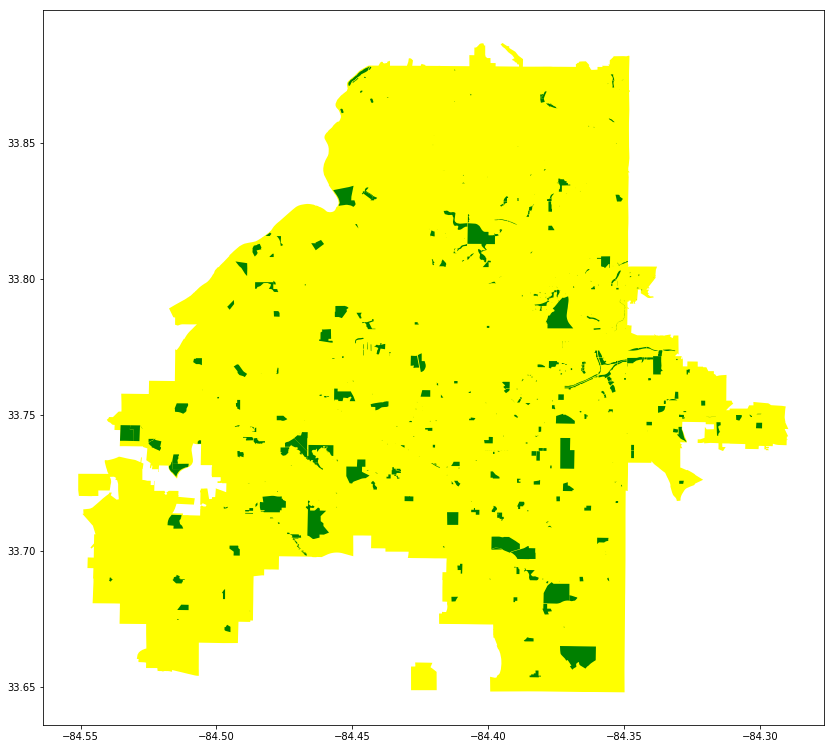

In [6]:
ax = atl_limits.plot(figsize=(14, 14), color='yellow')
atl_greenspaces.plot(ax=ax, color='green')
plt.show()